### Modelling

In [1]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

from textblob import Word, TextBlob
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, \
    plot_roc_curve, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

from warnings import filterwarnings

filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
df_ = pd.read_csv("sentiment_label_data.csv")

In [3]:
df_.dropna(inplace = True)

In [4]:
df = df_.copy()
df = df[["user_location","date","text","polarity_score","sentiment_label"]]

In [5]:
df.head()

,user_location,date,text,polarity_score,sentiment_label
0,United States,2020-12-08,removed cfo chieffinancialofficer wonder makin...,0.00,neutral
1,United States,2020-12-08,one trusting gate amp fauci amp mandate yall b...,0.68,positive
2,India,2020-12-08,putin daughter vaccinated first approved vacci...,0.42,positive
3,India,2020-12-08,marketwatch putin daughter vaccinated st appro...,0.42,positive
4,India,2020-12-08,abc debrobertsabc natgeo putin daughter vaccin...,0.42,positive


### Feature Engineering


In [6]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
### TF-IDF ###
vectorizer = TfidfVectorizer(max_features=2000, max_df = 0.90, min_df = 10, stop_words=stopwords.words('english'))
features = vectorizer.fit_transform(df['text'].values).toarray()

In [8]:
# Categoric label convert to numeric value
df["sentiment_label_encoding"] = LabelEncoder().fit_transform(df["sentiment_label"])

In [9]:
df.head()

,user_location,date,text,polarity_score,sentiment_label,sentiment_label_encoding
0,United States,2020-12-08,removed cfo chieffinancialofficer wonder makin...,0.00,neutral,1
1,United States,2020-12-08,one trusting gate amp fauci amp mandate yall b...,0.68,positive,2
2,India,2020-12-08,putin daughter vaccinated first approved vacci...,0.42,positive,2
3,India,2020-12-08,marketwatch putin daughter vaccinated st appro...,0.42,positive,2
4,India,2020-12-08,abc debrobertsabc natgeo putin daughter vaccin...,0.42,positive,2


In [10]:
# 0: negative
# 1: neutral
# 2: positive

In [11]:
df.head()

,user_location,date,text,polarity_score,sentiment_label,sentiment_label_encoding
0,United States,2020-12-08,removed cfo chieffinancialofficer wonder makin...,0.00,neutral,1
1,United States,2020-12-08,one trusting gate amp fauci amp mandate yall b...,0.68,positive,2
2,India,2020-12-08,putin daughter vaccinated first approved vacci...,0.42,positive,2
3,India,2020-12-08,marketwatch putin daughter vaccinated st appro...,0.42,positive,2
4,India,2020-12-08,abc debrobertsabc natgeo putin daughter vaccin...,0.42,positive,2


In [13]:
# The model is installed on the train set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, df['sentiment_label_encoding'].values, test_size=0.20, random_state=42)

### Multi Logistic Regression

In [14]:
model_multilog_reg = LogisticRegression(random_state=1, multi_class='multinomial', solver='newton-cg').fit(X_train, y_train)

#### Success Evaluation

In [15]:
y_pred = model_multilog_reg.predict(X_train)

In [16]:
print('Train Accuracy Score:', metrics.accuracy_score(y_train, y_pred))

Train Accuracy Score: 0.8730792407351612


In [17]:
# test
y_prob = model_multilog_reg.predict_proba(X_test)[:,1]

In [18]:
# y_pred for other metrics
y_pred = model_multilog_reg.predict(X_test)

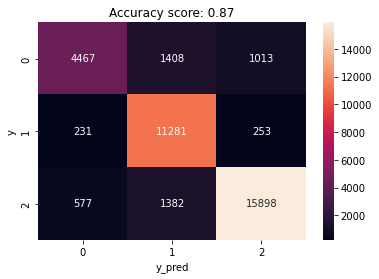

In [19]:

# Confusion Matrix
def plot_confision_matrix(y, y_red):
    acc = round(accuracy_score(y, y_pred), 2)
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot = True, fmt=".0f")
    plt.xlabel("y_pred")
    plt.ylabel("y")
    plt.title("Accuracy score: {0}".format((acc), size=10))
    plt.show()

plot_confision_matrix(y_test, y_pred)

In [20]:
print('Test Accuracy Score:', metrics.accuracy_score(y_test, y_pred))

Test Accuracy Score: 0.8667762256915913


In [21]:
print('Precision Score:', metrics.precision_score(y_test, y_pred, average='weighted'))
# average parameter neccessary for multi class label 

Precision Score: 0.8711324889327435


In [22]:
print('Recall Score:', metrics.recall_score(y_test, y_pred, average='weighted'))

Recall Score: 0.8667762256915913


In [23]:
print('F1-Score Score:', metrics.f1_score(y_test, y_pred, average='weighted'))

F1-Score Score: 0.8640398564657359


In [24]:
class_report=classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.85      0.65      0.73      6888
           1       0.80      0.96      0.87     11765
           2       0.93      0.89      0.91     17857

    accuracy                           0.87     36510
   macro avg       0.86      0.83      0.84     36510
weighted avg       0.87      0.87      0.86     36510



### Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
# RF Trial:
rf = RandomForestClassifier(criterion = 'entropy', random_state = 1)

In [27]:
rf_model = rf.fit(X_train,y_train)

In [31]:
# train accuracy
y_pred = rf_model.predict(X_train)

In [32]:
print('Train Accuracy Score:', metrics.accuracy_score(y_train, y_pred))

Train Accuracy Score: 0.9971650825823769


In [33]:
# test accuracy
y_pred = rf_model.predict(X_test)

In [34]:
print('Test Accuracy Score:', metrics.accuracy_score(y_test, y_pred))

Test Accuracy Score: 0.8503423719528896


In [35]:
print('Precision Score:', metrics.precision_score(y_test, y_pred, average='weighted'))

Precision Score: 0.8572166837264412


In [36]:
print('Recall Score:', metrics.recall_score(y_test, y_pred, average='weighted'))

Recall Score: 0.8503423719528896


In [37]:
print('F1-Score Score:', metrics.f1_score(y_test, y_pred, average='weighted'))

F1-Score Score: 0.846027132387373


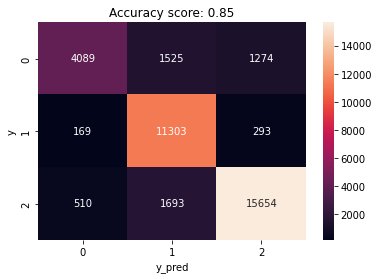

In [38]:
# Confusion Matrix
def plot_confision_matrix(y, y_red):
    acc = round(accuracy_score(y, y_pred), 2)
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot = True, fmt=".0f")
    plt.xlabel("y_pred")
    plt.ylabel("y")
    plt.title("Accuracy score: {0}".format((acc), size=10))
    plt.show()

plot_confision_matrix(y_test, y_pred)

In [39]:
 
print(class_report)

              precision    recall  f1-score   support

           0       0.85      0.65      0.73      6888
           1       0.80      0.96      0.87     11765
           2       0.93      0.89      0.91     17857

    accuracy                           0.87     36510
   macro avg       0.86      0.83      0.84     36510
weighted avg       0.87      0.87      0.86     36510



## Naive Bayes

In [40]:
from sklearn.naive_bayes import MultinomialNB

In [41]:
clf = MultinomialNB().fit(X_train, y_train)

In [42]:
y_pred = clf.predict(X_train)

In [43]:
print('Train Accuracy Score:', metrics.accuracy_score(y_train, y_pred))

Train Accuracy Score: 0.7725697773151825


In [44]:
# test
y_prob = clf.predict_proba(X_test)[:,1]

In [45]:
# y_pred for other metrics
y_pred = clf.predict(X_test)

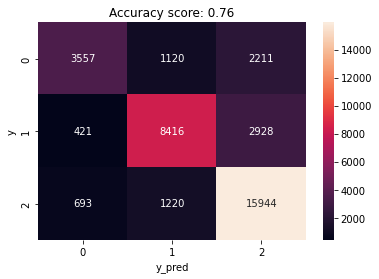

In [46]:
# Confusion Matrix
def plot_confision_matrix(y, y_red):
    acc = round(accuracy_score(y, y_pred), 2)
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot = True, fmt=".0f")
    plt.xlabel("y_pred")
    plt.ylabel("y")
    plt.title("Accuracy score: {0}".format((acc), size=10))
    plt.show()

plot_confision_matrix(y_test, y_pred)

In [47]:
print('Test Accuracy Score:', metrics.accuracy_score(y_test, y_pred))

Test Accuracy Score: 0.7646398247055601


In [48]:
print('Precision Score:', metrics.precision_score(y_test, y_pred, average='weighted'))
# average parameter neccessary for multi class label 

Precision Score: 0.7656831223918131


In [49]:
print('Recall Score:', metrics.recall_score(y_test, y_pred, average='weighted'))

Recall Score: 0.7646398247055601


In [50]:
print('F1-Score Score:', metrics.f1_score(y_test, y_pred, average='weighted'))

F1-Score Score: 0.7574746488429717


In [51]:
class_report=classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.76      0.52      0.62      6888
           1       0.78      0.72      0.75     11765
           2       0.76      0.89      0.82     17857

    accuracy                           0.76     36510
   macro avg       0.77      0.71      0.73     36510
weighted avg       0.77      0.76      0.76     36510



## Ridge

In [52]:
from sklearn.linear_model import RidgeClassifier

In [53]:
clf = RidgeClassifier().fit(X_train, y_train)

In [54]:
y_pred = clf.predict(X_train)

In [55]:
print('Train Accuracy Score:', metrics.accuracy_score(y_train, y_pred))

Train Accuracy Score: 0.8632665917992823


In [56]:
# y_pred for other metrics
y_pred = clf.predict(X_test)

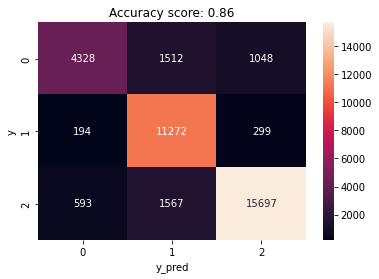

In [57]:
# Confusion Matrix
def plot_confision_matrix(y, y_red):
    acc = round(accuracy_score(y, y_pred), 2)
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot = True, fmt=".0f")
    plt.xlabel("y_pred")
    plt.ylabel("y")
    plt.title("Accuracy score: {0}".format((acc), size=10))
    plt.show()

plot_confision_matrix(y_test, y_pred)

In [58]:
print('Test Accuracy Score:', metrics.accuracy_score(y_test, y_pred))

Test Accuracy Score: 0.8572172007669132


In [59]:
print('Precision Score:', metrics.precision_score(y_test, y_pred, average='weighted'))
# average parameter neccessary for multi class label 

Precision Score: 0.8631820635538103


In [60]:
print('Recall Score:', metrics.recall_score(y_test, y_pred, average='weighted'))

Recall Score: 0.8572172007669132


In [61]:
print('F1-Score Score:', metrics.f1_score(y_test, y_pred, average='weighted'))

F1-Score Score: 0.8541715865256048


In [62]:
class_report=classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.85      0.63      0.72      6888
           1       0.79      0.96      0.86     11765
           2       0.92      0.88      0.90     17857

    accuracy                           0.86     36510
   macro avg       0.85      0.82      0.83     36510
weighted avg       0.86      0.86      0.85     36510

